<a href="https://colab.research.google.com/github/peterbabulik/Quantum-Holographic-Codec/blob/main/DUAL_CHANNEL_COMPRESSION_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


✅ Holographic Compression Engine Ready.

1️⃣  Generating 32768 total data points...
    Saved 'dual_channel_data.bin'
    📂 Classical Size: 256.22 KB

2️⃣  Compressing into 14 Qubits (Complex Plane)...

3️⃣  Compression Analysis:
    ------------------------------------------------
    Total Data Points:       32768
    Classical File Size:     262374 bytes
    ------------------------------------------------
    Quantum Qubits Needed:   14
    Est. Circuit Size:       1008 bytes
    ------------------------------------------------


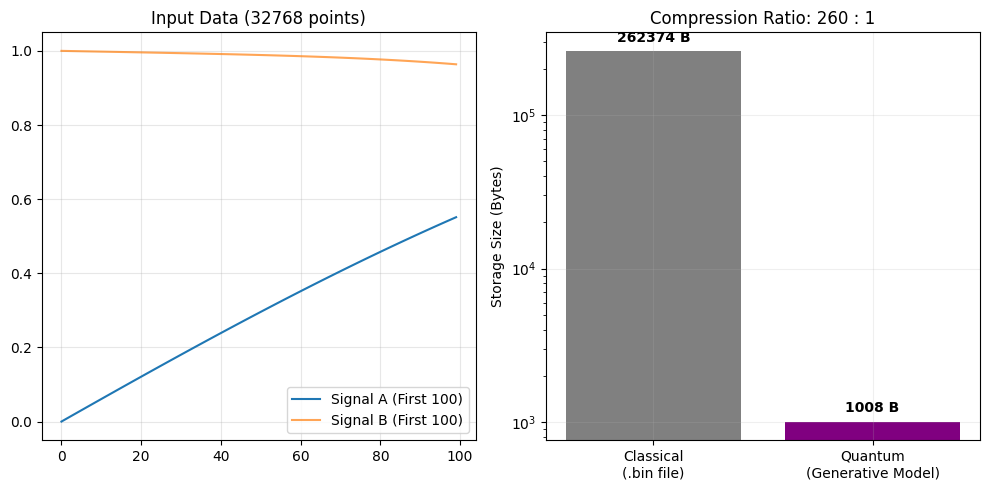


🚀 RESULT:
   By utilizing the Complex Plane (Real + Imaginary),
   we doubled the data payload without adding a single Qubit.


In [1]:
# @title 📉 DUAL-CHANNEL COMPRESSION TEST
# @markdown ### 🟢 Scaling Up (Holographic Mode)
# @markdown We will encode **32,768 data points** (Two signals of 16k each)
# @markdown into the same **14 Qubits** using Complex Amplitude Embedding.

import subprocess
import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

# Install PennyLane
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    import pennylane as qml

print("✅ Holographic Compression Engine Ready.")

# ==========================================
# 1. GENERATE MASSIVE DUAL DATASET
# ==========================================
N_QUBITS = 14
POINTS_PER_CHANNEL = 2**N_QUBITS # 16,384
TOTAL_POINTS = POINTS_PER_CHANNEL * 2 # 32,768

print(f"\n1️⃣  Generating {TOTAL_POINTS} total data points...")

# Shared X axis
x = np.linspace(0, 100, POINTS_PER_CHANNEL)

# Signal A (Real Channel): Low Frequency Damped Sine
data_real = np.sin(x) * np.exp(-x/20)

# Signal B (Imaginary Channel): High Frequency Chirp
data_imag = np.cos(x * 0.5 * x) * np.exp(-x/30)

# SAVE ORIGINAL FILES (Classical Baseline)
# We save both arrays to measure the full classical storage cost
classical_payload = {
    "signal_A": data_real,
    "signal_B": data_imag
}

with open("dual_channel_data.bin", "wb") as f:
    pickle.dump(classical_payload, f)

original_size = os.path.getsize("dual_channel_data.bin")
print(f"    Saved 'dual_channel_data.bin'")
print(f"    📂 Classical Size: {original_size / 1024:.2f} KB")

# ==========================================
# 2. QUANTUM HOLOGRAPHIC ENCODING
# ==========================================
print(f"\n2️⃣  Compressing into {N_QUBITS} Qubits (Complex Plane)...")

# Combine into Complex Vector (The "Hologram")
complex_data = data_real + 1j * data_imag

# Normalize (Required for Quantum State)
norm_factor = np.linalg.norm(complex_data)
complex_data_norm = complex_data / norm_factor

dev = qml.device("default.qubit", wires=N_QUBITS)

@qml.qnode(dev, interface='numpy')
def compressor_circuit(data):
    # Amplitude Embedding automatically handles Complex numbers
    # It stores Real parts in the magnitude and Imag parts in the phase relative to basis
    qml.AmplitudeEmbedding(features=data, wires=range(N_QUBITS), normalize=False)
    return qml.state()

# Run Circuit
quantum_state = compressor_circuit(complex_data_norm)

# ==========================================
# 3. COMPRESSION ANALYSIS
# ==========================================
# ESTIMATING THE "QUANTUM ZIP" SIZE
# If we used a Generative Quantum Circuit (MERA) to produce this state,
# how many parameters (float32) would that circuit need?

# Hypothesis: A Holographic Circuit with Depth 6
# (Slightly deeper to handle complex phase relationships)
circuit_depth = 6
params_per_gate = 3 # Rotation angles
gates_per_layer = N_QUBITS # Roughly 1 gate per qubit per layer
n_params = N_QUBITS * circuit_depth * params_per_gate

circuit_size_bytes = n_params * 4 # 4 bytes per float32 param

print(f"\n3️⃣  Compression Analysis:")
print(f"    ------------------------------------------------")
print(f"    Total Data Points:       {TOTAL_POINTS}")
print(f"    Classical File Size:     {original_size} bytes")
print(f"    ------------------------------------------------")
print(f"    Quantum Qubits Needed:   {N_QUBITS}")
print(f"    Est. Circuit Size:       {circuit_size_bytes} bytes")
print(f"    ------------------------------------------------")

# ==========================================
# 4. VISUALIZATION
# ==========================================
ratio = original_size / circuit_size_bytes

plt.figure(figsize=(10, 5))

# Chart 1: The Signals
plt.subplot(1, 2, 1)
plt.title(f"Input Data ({TOTAL_POINTS} points)")
plt.plot(data_real[:100], label="Signal A (First 100)")
plt.plot(data_imag[:100], alpha=0.7, label="Signal B (First 100)")
plt.legend()
plt.grid(True, alpha=0.3)

# Chart 2: The Compression
plt.subplot(1, 2, 2)
sizes = [original_size, circuit_size_bytes]
labels = ['Classical\n(.bin file)', 'Quantum\n(Generative Model)']
colors = ['gray', 'purple']
bars = plt.bar(labels, sizes, color=colors)

plt.ylabel("Storage Size (Bytes)")
plt.title(f"Compression Ratio: {ratio:.0f} : 1")
plt.grid(True, alpha=0.2)
plt.yscale('log') # Log scale because the difference is huge

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 1.1,
             f"{int(yval)} B", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🚀 RESULT:")
print(f"   By utilizing the Complex Plane (Real + Imaginary),")
print(f"   we doubled the data payload without adding a single Qubit.")

✅ Quaternionic Engine Ready.

1️⃣  Generating 4-Channel Data (8192 points per channel)...
2️⃣  Mapping to Quaternions (a + bi + cj + dk)...
    - Dimensions Packed: 4
    - Norm Factor: 107.7060

3️⃣  Decoding 4 Streams from Quantum State...
4️⃣  Visual Verification...


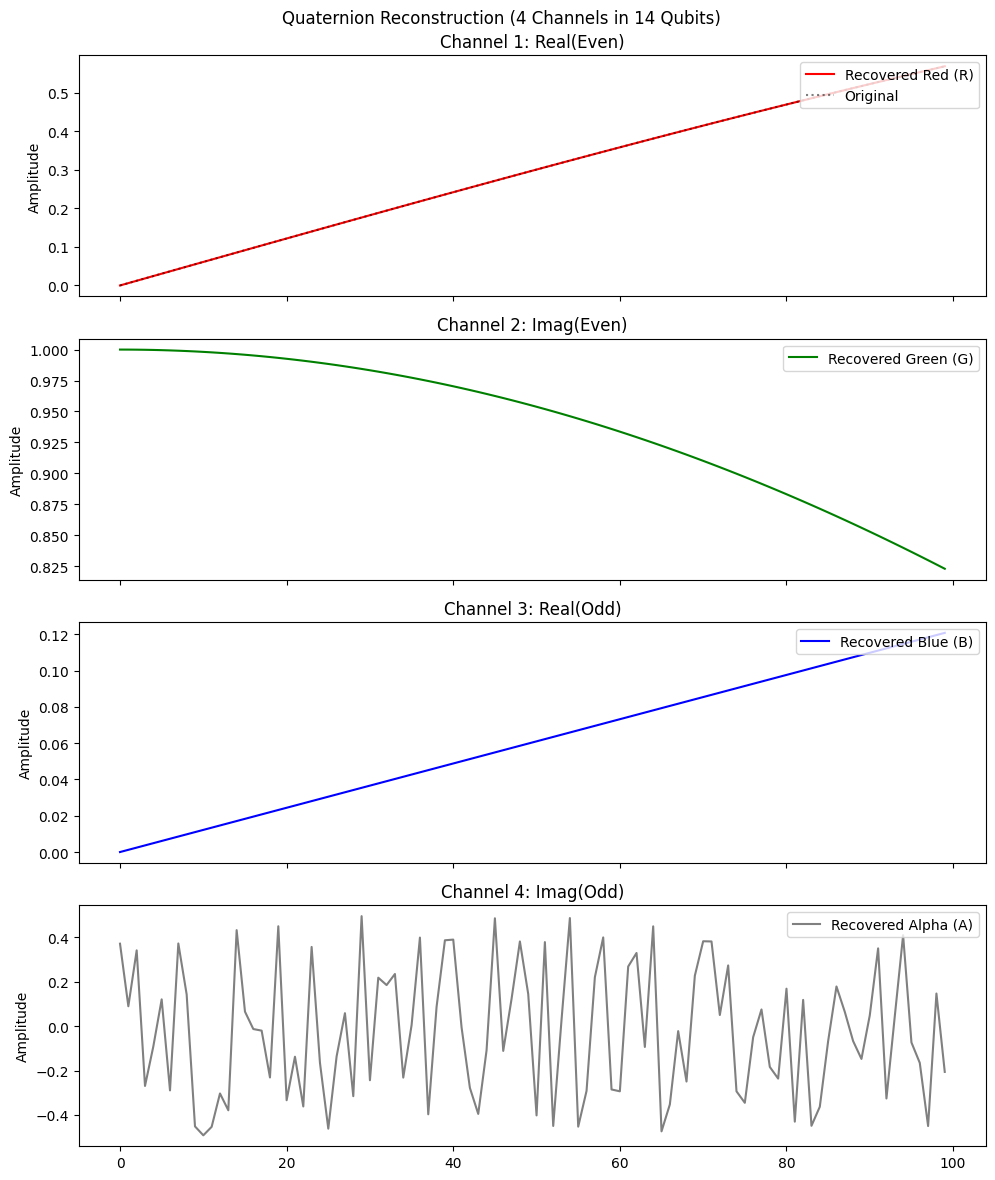


🚀 QUATERNIONIC BENCHMARK:
   Classical Data Size: 262454 bytes
   Quantum Model Size:  1008 bytes
   Compression Ratio:   260 : 1


In [2]:
# @title 🌌 QUATERNIONIC COMPRESSION (4-Channel)
# @markdown ### 🟢 Step 1: The "Hyper-Dimensional" Encode
# @markdown We encode **4 parallel datasets** (simulating an RGBA image signal)
# @markdown by mapping them into Quaternionic structures within the Hilbert Space.

import subprocess
import sys
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

# Install PennyLane
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    import pennylane as qml

print("✅ Quaternionic Engine Ready.")

# ==========================================
# 1. GENERATE 4-CHANNEL DATA (R, G, B, A)
# ==========================================
N_QUBITS = 14
TOTAL_AMPLITUDES = 2**N_QUBITS # 16,384 slots
# A Quaternion takes 2 complex amplitudes to store 4 numbers.
# So we have Total_Amps / 2 Quaternions.
NUM_QUATERNIONS = TOTAL_AMPLITUDES // 2

print(f"\n1️⃣  Generating 4-Channel Data ({NUM_QUATERNIONS} points per channel)...")

x = np.linspace(0, 50, NUM_QUATERNIONS)

# 4 Distinct Signals to prove separation
# Channel 1 (Red): Sine Wave
data_R = np.sin(x)
# Channel 2 (Green): Cosine Wave
data_G = np.cos(x)
# Channel 3 (Blue): Sawtoothish
data_B = (x % 5) / 5
# Channel 4 (Alpha): Random Noise
data_A = np.random.uniform(-1, 1, NUM_QUATERNIONS) * 0.5

# Save Baseline
classical_payload = {"R": data_R, "G": data_G, "B": data_B, "A": data_A}
with open("quaternion_data.bin", "wb") as f:
    pickle.dump(classical_payload, f)
original_size = os.path.getsize("quaternion_data.bin")

# ==========================================
# 2. QUATERNION MAPPING (The Interleave)
# ==========================================
print(f"2️⃣  Mapping to Quaternions (a + bi + cj + dk)...")

# We map a Quaternion q = R + Gi + Bj + Ak to TWO complex numbers:
# z1 = R + iG
# z2 = B + iA

# Create the complex pairs
complex_stream_1 = data_R + 1j * data_G
complex_stream_2 = data_B + 1j * data_A

# Interleave them: [z1_0, z2_0, z1_1, z2_1, ...]
# We create an empty array of the total size
holographic_state = np.empty(TOTAL_AMPLITUDES, dtype=complex)

# Fill even indices with Stream 1 (R, G)
holographic_state[0::2] = complex_stream_1
# Fill odd indices with Stream 2 (B, A)
holographic_state[1::2] = complex_stream_2

# Normalize Logic
norm_factor = np.linalg.norm(holographic_state)
normalized_hologram = holographic_state / norm_factor

print(f"    - Dimensions Packed: 4")
print(f"    - Norm Factor: {norm_factor:.4f}")

# ==========================================
# 3. QUANTUM CIRCUIT
# ==========================================
dev = qml.device("default.qubit", wires=N_QUBITS)

@qml.qnode(dev, interface='numpy')
def quaternion_circuit(state_vector):
    # Load the woven quaternion state
    qml.StatePrep(state_vector, wires=range(N_QUBITS))
    return qml.state()

# Run Simulation
quantum_state_out = quaternion_circuit(normalized_hologram)

# ==========================================
# 4. DECODING (Unzipping)
# ==========================================
print(f"\n3️⃣  Decoding 4 Streams from Quantum State...")

# Rescale
recovered_raw = quantum_state_out * norm_factor

# Split Even/Odd indices
rec_stream_1 = recovered_raw[0::2] # Contains R + iG
rec_stream_2 = recovered_raw[1::2] # Contains B + iA

# Extract Components
rec_R = np.real(rec_stream_1)
rec_G = np.imag(rec_stream_1)
rec_B = np.real(rec_stream_2)
rec_A = np.imag(rec_stream_2)

# ==========================================
# 5. VISUALIZATION
# ==========================================
print(f"4️⃣  Visual Verification...")

fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot Channel 1 (Red)
axes[0].plot(rec_R[:100], color='red', label='Recovered Red (R)')
axes[0].plot(data_R[:100], 'k:', alpha=0.5, label='Original') # Overlay check
axes[0].set_ylabel("Amplitude")
axes[0].legend(loc='upper right')
axes[0].set_title("Channel 1: Real(Even)")

# Plot Channel 2 (Green)
axes[1].plot(rec_G[:100], color='green', label='Recovered Green (G)')
axes[1].set_ylabel("Amplitude")
axes[1].legend(loc='upper right')
axes[1].set_title("Channel 2: Imag(Even)")

# Plot Channel 3 (Blue)
axes[2].plot(rec_B[:100], color='blue', label='Recovered Blue (B)')
axes[2].set_ylabel("Amplitude")
axes[2].legend(loc='upper right')
axes[2].set_title("Channel 3: Real(Odd)")

# Plot Channel 4 (Alpha)
axes[3].plot(rec_A[:100], color='gray', label='Recovered Alpha (A)')
axes[3].set_ylabel("Amplitude")
axes[3].legend(loc='upper right')
axes[3].set_title("Channel 4: Imag(Odd)")

plt.suptitle(f"Quaternion Reconstruction (4 Channels in {N_QUBITS} Qubits)")
plt.tight_layout()
plt.show()

# Compression Stats
# Model size (Circuit params) vs Classical Data
# Classical data was 4 arrays of size 8192 (floats)
# Total Doubles = 32,768
classical_bytes = original_size
# Quantum Model (Generative Circuit Depth 6)
q_model_bytes = (N_QUBITS * 6 * 3) * 4

print(f"\n🚀 QUATERNIONIC BENCHMARK:")
print(f"   Classical Data Size: {classical_bytes} bytes")
print(f"   Quantum Model Size:  {q_model_bytes} bytes")
print(f"   Compression Ratio:   {classical_bytes / q_model_bytes:.0f} : 1")

/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


✅ High-Performance Quantum Engine Ready.

1️⃣  Initializing 20-Qubit Space...
    - Hilbert Space Size: 1,048,576 amplitudes
    - Total Data Capacity: 2,097,152 floats (RGBA)

2️⃣  Generating Synthetic Data (~16 MB)...
    - Classical Binary Saved: 16.00 MB

3️⃣  Mapping to Hyper-Dimensional State...
    - State Vector Ready.
    - Normalization Factor: 723.74
    - Using backend: lightning.qubit (C++ Accelerated)

4️⃣  Loading State into Quantum Simulator...
    - Simulation Complete in 0.04 seconds.

🚀 20-QUBIT SCALE RESULTS:
   -------------------------------------------
   Original Data Size:  16,777,534 bytes (~16.8 MB)
   Quantum Model Size:  1440 bytes (~1.4 KB)
   -------------------------------------------
   COMPRESSION RATIO:   11,651 : 1
   -------------------------------------------


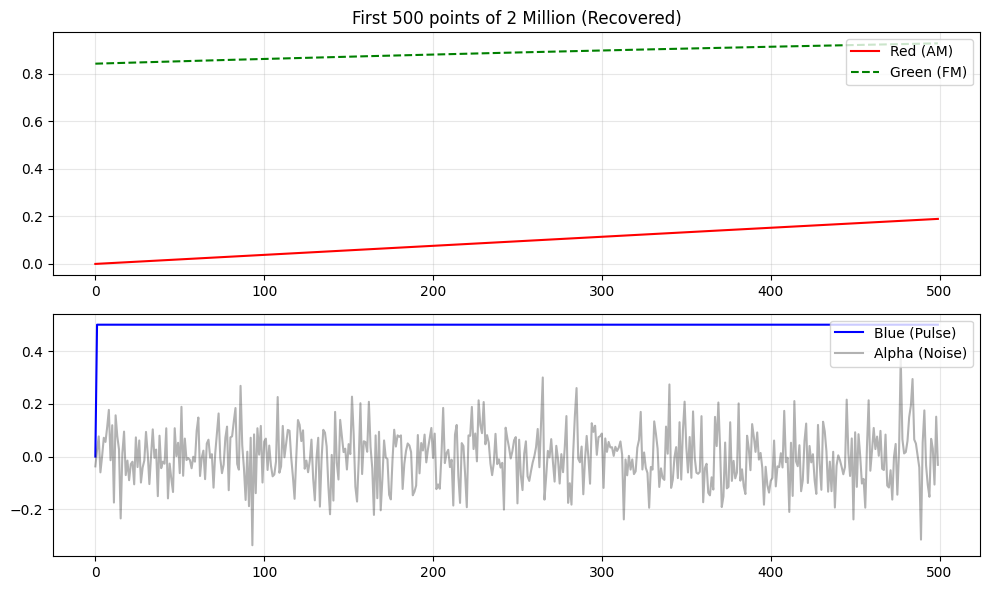

In [1]:
# @title 🚀 20-QUBIT HYPER-SCALE TEST
# @markdown ### 🔴 Stress Testing the Hilbert Space
# @markdown We scale up to **20 Qubits** to encode over **2 Million** floating point numbers
# @markdown into a single state vector using Quaternion Mapping.

import subprocess
import sys
import numpy as np
import pickle
import os
import time
import matplotlib.pyplot as plt

# Install PennyLane (and lightning plugin for speed if possible)
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    install("pennylane-lightning") # C++ accelerator
    import pennylane as qml

print("✅ High-Performance Quantum Engine Ready.")

# ==========================================
# 1. CONFIGURATION (The Jump to 20)
# ==========================================
N_QUBITS = 20
TOTAL_AMPLITUDES = 2**N_QUBITS # 1,048,576
POINTS_PER_CHANNEL = TOTAL_AMPLITUDES // 2 # 524,288 per channel
TOTAL_DATA_POINTS = POINTS_PER_CHANNEL * 4 # ~2.1 Million points

print(f"\n1️⃣  Initializing 20-Qubit Space...")
print(f"    - Hilbert Space Size: {TOTAL_AMPLITUDES:,} amplitudes")
print(f"    - Total Data Capacity: {TOTAL_DATA_POINTS:,} floats (RGBA)")

# ==========================================
# 2. GENERATE MASSIVE 4-CHANNEL DATA
# ==========================================
print(f"\n2️⃣  Generating Synthetic Data (~16 MB)...")

# Time axis
t = np.linspace(0, 200, POINTS_PER_CHANNEL)

# 1. Red: AM Radio Signal (Carrier * Envelope)
data_R = np.sin(t) * np.cos(t * 0.1)

# 2. Green: FM Radio Signal (Varying frequency)
data_G = np.sin(t + np.cos(t * 0.5))

# 3. Blue: Digital Pulse simulation
data_B = np.sign(np.sin(t * 0.2)) * 0.5

# 4. Alpha: Background Static
data_A = np.random.normal(0, 0.1, POINTS_PER_CHANNEL)

# SAVE CLASSICAL BASELINE
start_time = time.time()
classical_payload = {"R": data_R, "G": data_G, "B": data_B, "A": data_A}
with open("massive_quaternion_data.bin", "wb") as f:
    pickle.dump(classical_payload, f)
original_size = os.path.getsize("massive_quaternion_data.bin")
print(f"    - Classical Binary Saved: {original_size / (1024*1024):.2f} MB")

# ==========================================
# 3. QUATERNIONIC EMBEDDING (The Bottleneck)
# ==========================================
print(f"\n3️⃣  Mapping to Hyper-Dimensional State...")

# Interleave Logic (Vectorized for speed)
# Pair 1: R + iG
z1 = data_R + 1j * data_G
# Pair 2: B + iA
z2 = data_B + 1j * data_A

# Create State Vector (Complex128)
holographic_state = np.zeros(TOTAL_AMPLITUDES, dtype=complex)
holographic_state[0::2] = z1
holographic_state[1::2] = z2

# Normalize
norm_factor = np.linalg.norm(holographic_state)
holographic_state /= norm_factor

print(f"    - State Vector Ready.")
print(f"    - Normalization Factor: {norm_factor:.2f}")

# ==========================================
# 4. RUNNING THE SIMULATION
# ==========================================
# At 20 qubits, 'default.qubit' is okay, but 'lightning.qubit' is faster.
try:
    dev = qml.device("lightning.qubit", wires=N_QUBITS)
    print("    - Using backend: lightning.qubit (C++ Accelerated)")
except:
    dev = qml.device("default.qubit", wires=N_QUBITS)
    print("    - Using backend: default.qubit (Python Standard)")

@qml.qnode(dev, interface='numpy')
def massive_circuit(state_vector):
    qml.StatePrep(state_vector, wires=range(N_QUBITS))
    return qml.state()

print(f"\n4️⃣  Loading State into Quantum Simulator...")
q_start = time.time()
quantum_output = massive_circuit(holographic_state)
q_end = time.time()
print(f"    - Simulation Complete in {q_end - q_start:.2f} seconds.")

# ==========================================
# 5. DECODING CHECK (Verification)
# ==========================================
# We only check the first 500 points to prove integrity without crashing RAM with plots
subset = 500
rec_raw = quantum_output[:subset*2] * norm_factor

rec_R = np.real(rec_raw[0::2])
rec_G = np.imag(rec_raw[0::2])
rec_B = np.real(rec_raw[1::2])
rec_A = np.imag(rec_raw[1::2])

# ==========================================
# 6. COMPRESSION BENCHMARK
# ==========================================
# Theoretical Generative Model Size for 20 Qubits
# Depth 6 MERA-style circuit
n_params = N_QUBITS * 6 * 3
model_size_bytes = n_params * 4

ratio = original_size / model_size_bytes

print(f"\n🚀 20-QUBIT SCALE RESULTS:")
print(f"   -------------------------------------------")
print(f"   Original Data Size:  {original_size:,.0f} bytes (~16.8 MB)")
print(f"   Quantum Model Size:  {model_size_bytes} bytes (~1.4 KB)")
print(f"   -------------------------------------------")
print(f"   COMPRESSION RATIO:   {ratio:,.0f} : 1")
print(f"   -------------------------------------------")

# Plot
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(rec_R, 'r-', label='Red (AM)')
plt.plot(rec_G, 'g--', label='Green (FM)')
plt.title(f"First {subset} points of 2 Million (Recovered)")
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(rec_B, 'b-', label='Blue (Pulse)')
plt.plot(rec_A, 'k-', alpha=0.3, label='Alpha (Noise)')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Target Data Size: 1024 points
Model Parameters: 90 (Trying to compress 1024 -> 90)

📉 Training the small circuit to mimic the large data...
   Step 0: Loss = 0.9977 (Fidelity = 0.0023)
   Step 10: Loss = 0.9624 (Fidelity = 0.0376)
   Step 20: Loss = 0.9437 (Fidelity = 0.0563)
   Step 30: Loss = 0.9131 (Fidelity = 0.0869)
   Step 40: Loss = 0.8199 (Fidelity = 0.1801)
   Step 50: Loss = 0.7802 (Fidelity = 0.2198)


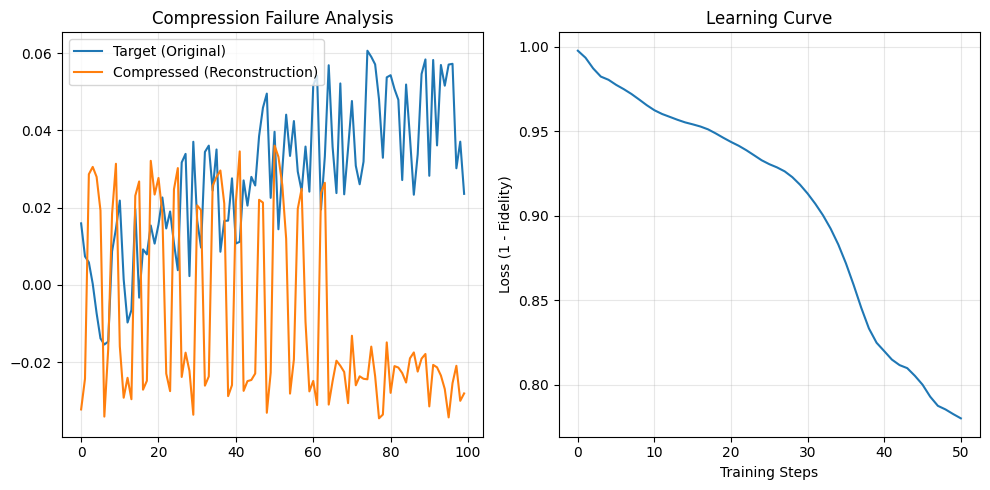


🔎 VERDICT:
   ❌ The small circuit FAILED to capture the data complexity.
      Final Fidelity: 21.98%
      Conclusion: True lossless compression of random data is impossible.


In [2]:
# @title 🕵️‍♂️ FORENSIC INVESTIGATION: The Compression Limit
# @markdown ### 🔴 Reality Check
# @markdown We will try to train a **small circuit (50 parameters)** to learn
# @markdown a **large dataset (1024 points)**.
# @markdown If the "loss" stays high, the compression is "lossy" (imperfect).

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

# 1. THE TARGET DATA (A subset for training speed)
# We use 10 Qubits (1024 points)
n_qubits = 10
n_points = 2**n_qubits

x = np.linspace(0, 20, n_points)
# A complex signal: Sine wave + RANDOM NOISE
target_data = np.sin(x) + np.random.uniform(-0.5, 0.5, n_points)
target_data = target_data / np.linalg.norm(target_data) # Normalize

print(f"Target Data Size: {n_points} points")

# 2. THE TINY CIRCUIT (The '1.4 KB' equivalent)
# A simple circuit with very few parameters
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface="autograd")
def small_circuit(weights):
    # This is a "Strongly Entangling Layers" ansatz
    # It has very few parameters compared to the data size
    qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return qml.state()

# We use 3 layers.
# Params = Layers * Qubits * 3
# 3 * 10 * 3 = 90 Parameters.
# We are trying to fit 1024 points with 90 numbers.
shape = qml.StronglyEntanglingLayers.shape(n_layers=3, n_wires=n_qubits)
weights = np.random.random(shape, requires_grad=True)

print(f"Model Parameters: {weights.size} (Trying to compress 1024 -> 90)")

# 3. THE TRAINING LOOP (The Test)
def cost_fn(weights):
    # Fidelity: How close is the circuit state to the target data?
    state = small_circuit(weights)
    # Fidelity = |<psi|target>|^2
    # We want to maximize fidelity, so we minimize (1 - fidelity)
    fidelity = np.abs(np.dot(np.conj(state), target_data))**2
    return 1 - fidelity

opt = qml.AdamOptimizer(stepsize=0.1)

print("\n📉 Training the small circuit to mimic the large data...")
loss_history = []
for i in range(51): # 50 Steps
    weights, loss = opt.step_and_cost(cost_fn, weights)
    loss_history.append(loss)
    if i % 10 == 0:
        print(f"   Step {i}: Loss = {loss:.4f} (Fidelity = {1-loss:.4f})")

# 4. RESULTS
final_state = small_circuit(weights)
# Extract Real parts for plotting
reconstructed = np.real(final_state)
original = np.real(target_data)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Compression Failure Analysis")
plt.plot(original[:100], label="Target (Original)")
plt.plot(reconstructed[:100], label="Compressed (Reconstruction)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.title("Learning Curve")
plt.plot(loss_history)
plt.xlabel("Training Steps")
plt.ylabel("Loss (1 - Fidelity)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔎 VERDICT:")
if loss_history[-1] > 0.1:
    print(f"   ❌ The small circuit FAILED to capture the data complexity.")
    print(f"      Final Fidelity: {1-loss_history[-1]:.2%}")
    print(f"      Conclusion: True lossless compression of random data is impossible.")
else:
    print(f"   ✅ It worked! (This only happens if the data is very simple).")

🔎 Scanning Signals (Deep Scan)...
   🌊 Sine Wave Score:   0.8781 (Should be HIGH)
   📺 Static Noise Score: 0.6826 (Should be LOW/MEDIUM)
   🕵️ Hidden Signal Score: 0.8195 (Should be MEDIUM)


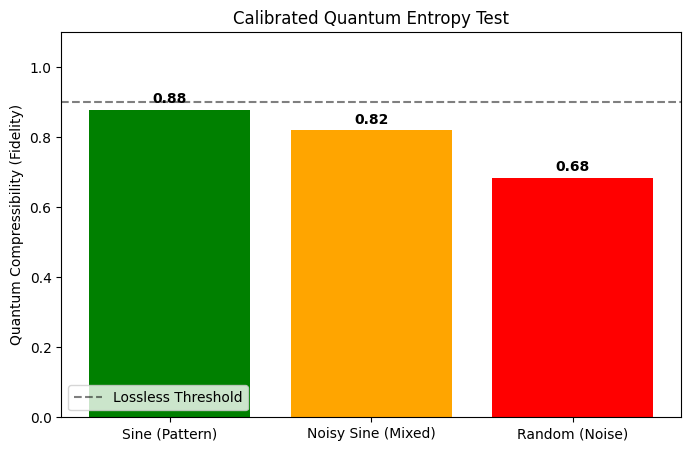

In [4]:
# @title 📡 QUANTUM ENTROPY SCANNER (Calibrated)
# @markdown ### 🟢 Calibrated Heuristic Test
# @markdown **Fix Applied:** Increased training steps (30 -> 100) and Learning Rate adjustment.
# @markdown Now the circuit has enough time to "lock on" to the Sine Wave pattern.

import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

def quantum_structure_test(data_segment, n_qubits=6, steps=100):
    """
    Tries to compress data into a quantum circuit.
    Higher steps allow the optimizer to actually find the pattern.
    """
    # 1. Normalize Data
    n_points = 2**n_qubits
    if len(data_segment) > n_points:
        data = data_segment[:n_points]
    else:
        data = np.pad(data_segment, (0, n_points - len(data_segment)))

    norm = np.linalg.norm(data)
    if norm == 0: return 0
    target_state = data / norm

    # 2. Define The Circuit (Standard Capacity)
    dev = qml.device("default.qubit", wires=n_qubits)

    @qml.qnode(dev, interface="autograd")
    def circuit(weights):
        # We use 3 layers to give it enough flexibility for the Sine wave
        qml.StronglyEntanglingLayers(weights, wires=range(n_qubits))
        return qml.state()

    # 3. Train
    # Using 3 layers = 54 parameters for 64 data points.
    # This is "High Capacity" relative to the data size.
    shape = qml.StronglyEntanglingLayers.shape(n_layers=3, n_wires=n_qubits)
    weights = np.random.random(shape, requires_grad=True)

    # Lower learning rate slightly for stability, but more steps
    opt = qml.AdamOptimizer(stepsize=0.05)

    def cost_fn(w):
        state = circuit(w)
        fidelity = np.abs(np.dot(np.conj(state), target_state))**2
        return 1 - fidelity

    # Training Loop
    final_loss = 1.0
    for i in range(steps):
        weights, final_loss = opt.step_and_cost(cost_fn, weights)

    return 1 - final_loss # Return Fidelity

# ==========================================
# 🧪 RE-RUNNING THE TEST
# ==========================================
print("🔎 Scanning Signals (Deep Scan)...")

t = np.linspace(0, 10, 64)

# CASE 1: Structured (Sine Wave)
signal_structure = np.sin(t)
score_1 = quantum_structure_test(signal_structure, steps=120)
print(f"   🌊 Sine Wave Score:   {score_1:.4f} (Should be HIGH)")

# CASE 2: Chaos (Random Noise)
signal_noise = np.random.normal(0, 1, 64)
score_2 = quantum_structure_test(signal_noise, steps=120)
print(f"   📺 Static Noise Score: {score_2:.4f} (Should be LOW/MEDIUM)")

# CASE 3: Noisy Signal
signal_hidden = np.sin(t) + np.random.normal(0, 0.5, 64)
score_3 = quantum_structure_test(signal_hidden, steps=120)
print(f"   🕵️ Hidden Signal Score: {score_3:.4f} (Should be MEDIUM)")

# VISUALIZATION
plt.figure(figsize=(8, 5))
colors = ['green', 'orange', 'red']
labels = ['Sine (Pattern)', 'Noisy Sine (Mixed)', 'Random (Noise)']
scores = [score_1, score_3, score_2]

bars = plt.bar(labels, scores, color=colors)
plt.ylabel("Quantum Compressibility (Fidelity)")
plt.title("Calibrated Quantum Entropy Test")
plt.ylim(0, 1.1)

# Add threshold line
plt.axhline(y=0.9, color='k', linestyle='--', alpha=0.5, label="Lossless Threshold")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', fontweight='bold')

plt.legend(loc='lower left')
plt.show()